In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [66]:
task = "regression" #"classification" #"regression"
data = "openml_361622" 
# "openml_43" "openml_9946" "openml_9978" "openml_146819" "openml_361062" "openml_361070"
# "openml_361242" "openml_361253" "openml_361254" "openml_361259" "openml_361260" "openml_361622"

ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_{task}_{data}/{data}_stability/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
for split_seed in split_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features",  "avg_10_features_all", "avg_20_features_all", "avg_30_features_all", "avg_40_features_all"]].mean().reset_index()

In [67]:
methods = [
    'LIME_RF',
    'MDI',
    # 'Random',
    'TreeSHAP_RF',
    # 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
    'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_bootstrap_RFPlus',
    # 'Local_MDI+_MDI_lasso_fit_on_all_ranking_bootstrap_RFPlus',
    'Local_MDI+_MDI_ridge_fit_on_all_RFPlus',
]

color_map = {
    # Core methods
    'Random': 'gray',  # Neutral color
    'LIME_RF': '#71BEB7',  # Turquoise
    'TreeSHAP_RF': 'orange',  # Distinctive orange
    'MDI': '#8B4513',  # Brown for distinction
    'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#3357FF',  # Blue
    'Local_MDI+_MDI_ridge_fit_on_all_RFPlus': '#E91E63'
}
# method_names = {'TreeSHAP_RF': 'SHAP', 'Local_MDI+_fit_on_all_ranking_RFPlus': "LMDI+", 'LIME_RF': 'LIME'}

In [68]:
combined_df["num_features"].unique()

array([17.])

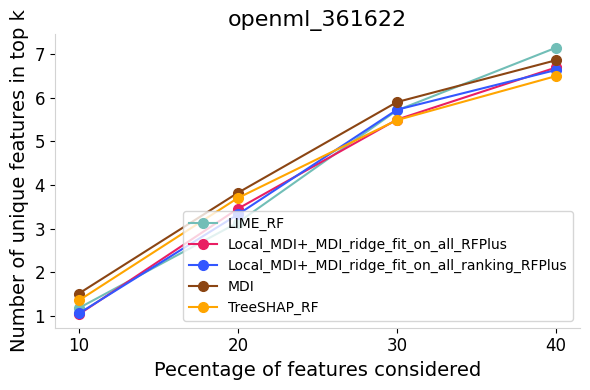

In [69]:
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Increase data marker size
marker_size = 7
df = combined_df
df = df[df['fi'].isin(methods)]

x = [10,20,30,40]
fig, ax = plt.subplots(figsize=(6, 4))

for index, row in df.iterrows():
    y = [ row['avg_10_features_all'], row['avg_20_features_all'], row['avg_30_features_all'], row['avg_40_features_all']]
    ax.plot(x, y, '-o', label=row['fi'], color=color_map[row['fi']], markersize=7)

ax.set_xlabel('Pecentage of features considered', fontsize=14)
ax.set_ylabel('Number of unique features in top k', fontsize=14)
ax.set_title(data, fontsize=16)
ax.legend(fontsize=10, title_fontsize=12)
ax.set_xticks(x)  
ax.set_xticklabels(x)  

plt.tight_layout()
# plt.savefig(f'{task}_{data}_stability.png')
plt.show()